## MODELO DE COLAS G/G/1

Ingresa valor para lambda: 	10


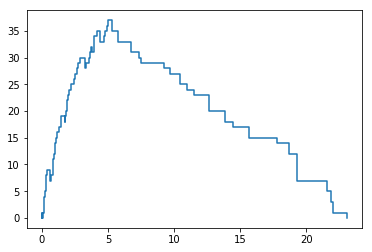

Tiempo medio del sistema:  9.628427019571003
Tiempo medio de la cola:  9.152255749512708
Tiempo medio del servidor:  0.4881584658995906


In [2]:
import matplotlib.pyplot as plt
from math import exp
from math import sqrt
from math import pi
from math import log
from math import fabs
import math 
import numpy as np
import random

def generador():
    a = 22695477
    b = 7
    m = 2**32
    x0 = random.randint(123456, 987654)
    xi = (a*x0+b)%m
    return (xi/m)

def exponencial(l):
    U = generador()
    x = -(log(1-U)/float(l))
    return x

def normal(): 
    x = sqrt(-2*math.log1p(generador()-1))*math.sin(2*math.pi*generador())
    if x < 0:
        x = 0
    return (x)

def llegada(tsuc):
    global t, n, NLL, LL, parametro_lambda
    t = tsuc
    clientes.append(n)
    tiempo.append(t)
    n = n + 1
    clientes.append(n)
    tiempo.append(t)
    NLL = NLL + 1
    LL.append(t)
    X = exponencial(parametro_lambda)
    if t + X < T:
        TSuc['tLL'] = t + X
    if n == 1:
        Y = normal()
        TSuc['tS'] = t + Y
        serv.append(Y)
        
    
def servidor(tsuc):
    global t, n, NS, S
    t = tsuc
    clientes.append(n)
    tiempo.append(t)
    n = n - 1
    clientes.append(n)
    tiempo.append(t)
    NS = NS + 1
    S.append(t)
    if n > 0:
        Y = normal()
        TSuc['tS'] = t + Y
        serv.append(Y)
        

t = tsuc = NLL = NS = n = 0
T = 5
M = 9999999999
TSuc = {'tLL':M, 'tS':M} 
LL = [0] 
S = [0] 
serv = [0] 
tiempo = []
clientes = []
parametro_lambda= float(input("Ingresa valor para lambda: \t"))
X = exponencial(parametro_lambda)
if X > T:
    Tp = t_med_sistema = t_med_cola = 0
else:
    llegada(X)
    while (TSuc['tLL'] != M or TSuc['tS'] != M):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            llegada(tsuc)
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            servidor(tsuc)
    Tp = max(0, t - T) 
    acumulo1 = acumulo2 = 0
    ind = 0
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1 / NLL 
    t_med_cola = acumulo2 / NLL 
    plt.plot(tiempo, clientes)
    plt.show()

    
print ("Tiempo medio del sistema: ",t_med_sistema)
print ("Tiempo medio de la cola: ",t_med_cola)
print ("Tiempo medio del servidor: ",sum(serv)/len(serv))